In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "emilia-romagna"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,8,Emilia-Romagna,15,2,17,9,26,8,8,...,0.0,243.0,0.0,3.0,11.76,65.38,3.29,0.00,0.00,44.44
1,2020-02-26T18:00:00,8,Emilia-Romagna,20,3,23,23,46,20,21,...,1.0,186.0,0.0,14.0,13.04,50.00,11.29,0.00,50.00,76.92
2,2020-02-27T18:00:00,8,Emilia-Romagna,36,6,42,54,96,50,50,...,0.0,456.0,0.0,31.0,14.29,43.75,10.96,0.00,100.00,108.70
3,2020-02-28T18:00:00,8,Emilia-Romagna,56,6,62,81,143,47,48,...,1.0,244.0,0.0,27.0,9.68,43.36,19.67,0.00,0.00,48.96
4,2020-02-29T17:00:00,8,Emilia-Romagna,86,11,97,116,213,70,72,...,2.0,273.0,0.0,35.0,11.34,45.54,26.37,0.00,83.33,48.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2021-03-09T17:00:00,8,Emilia-Romagna,3044,307,3351,55045,58396,1378,2429,...,44.0,43575.0,5639.0,1273.0,9.16,5.74,5.57,43.08,7.34,2.42
379,2021-03-10T17:00:00,8,Emilia-Romagna,3094,333,3427,56021,59448,1052,2155,...,43.0,41414.0,7051.0,976.0,9.72,5.76,5.20,30.56,8.47,1.80
380,2021-03-11T17:00:00,8,Emilia-Romagna,3161,345,3506,57160,60666,1218,2845,...,45.0,39832.0,7128.0,1139.0,9.84,5.78,7.14,39.91,3.60,2.05
381,2021-03-12T17:00:00,8,Emilia-Romagna,3197,350,3547,59070,62617,1951,3477,...,35.0,47160.0,7619.0,1910.0,9.87,5.66,7.37,45.64,1.45,3.22


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 2) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 2950
Nuovi tamponi: 39228.0
Percentuale nuovi positivi/nuovi tamponi: 8.0 %
Nuovi guariti: 1023.0
Nuovi deceduti: 31.0
Variazione positivi ricoverati con sintomi: 57.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 1809.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 13, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-12T17:00:00,8,Emilia-Romagna,2730,237,2967,57225,60192,-1274,1563,...,51.0,16653.0,3588.0,-1262.0,7.99,4.93,9.39,43.56,-0.42,-2.07
1,2021-01-13T17:00:00,8,Emilia-Romagna,2679,229,2908,55072,57980,-2212,1178,...,66.0,15833.0,4559.0,-2153.0,7.87,5.02,7.44,25.84,-3.38,-3.67
2,2021-01-14T17:00:00,8,Emilia-Romagna,2610,233,2843,53105,55948,-2032,1515,...,70.0,15033.0,4724.0,-1967.0,8.20,5.08,10.08,32.07,1.75,-3.50
3,2021-01-15T17:00:00,8,Emilia-Romagna,2511,231,2742,52768,55510,-438,1794,...,67.0,22380.0,4495.0,-337.0,8.42,4.94,8.02,39.91,-0.86,-0.78
4,2021-01-16T17:00:00,8,Emilia-Romagna,2508,231,2739,52541,55280,-230,1674,...,48.0,20812.0,4548.0,-227.0,8.43,4.95,8.04,36.81,0.00,-0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-09T17:00:00,8,Emilia-Romagna,3044,307,3351,55045,58396,1378,2429,...,44.0,43575.0,5639.0,1273.0,9.16,5.74,5.57,43.08,7.34,2.42
57,2021-03-10T17:00:00,8,Emilia-Romagna,3094,333,3427,56021,59448,1052,2155,...,43.0,41414.0,7051.0,976.0,9.72,5.76,5.20,30.56,8.47,1.80
58,2021-03-11T17:00:00,8,Emilia-Romagna,3161,345,3506,57160,60666,1218,2845,...,45.0,39832.0,7128.0,1139.0,9.84,5.78,7.14,39.91,3.60,2.05
59,2021-03-12T17:00:00,8,Emilia-Romagna,3197,350,3547,59070,62617,1951,3477,...,35.0,47160.0,7619.0,1910.0,9.87,5.66,7.37,45.64,1.45,3.22


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

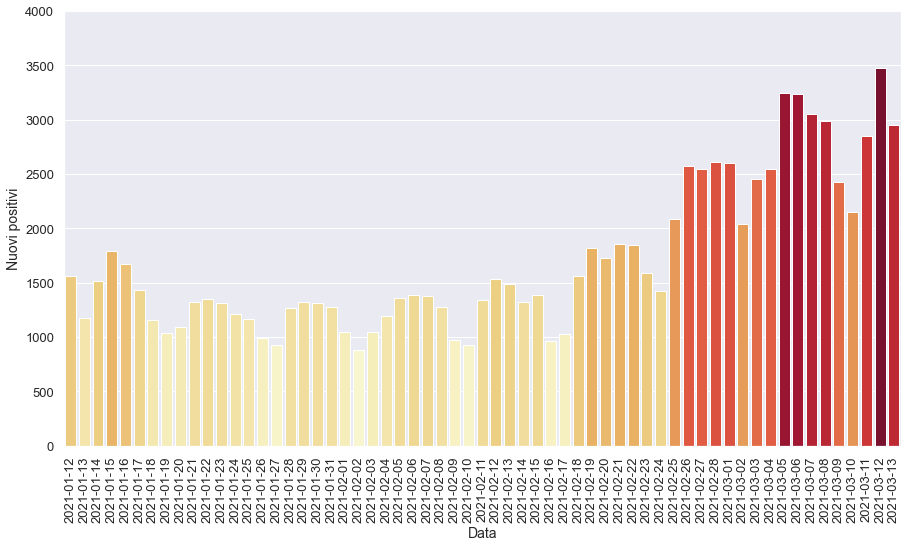

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

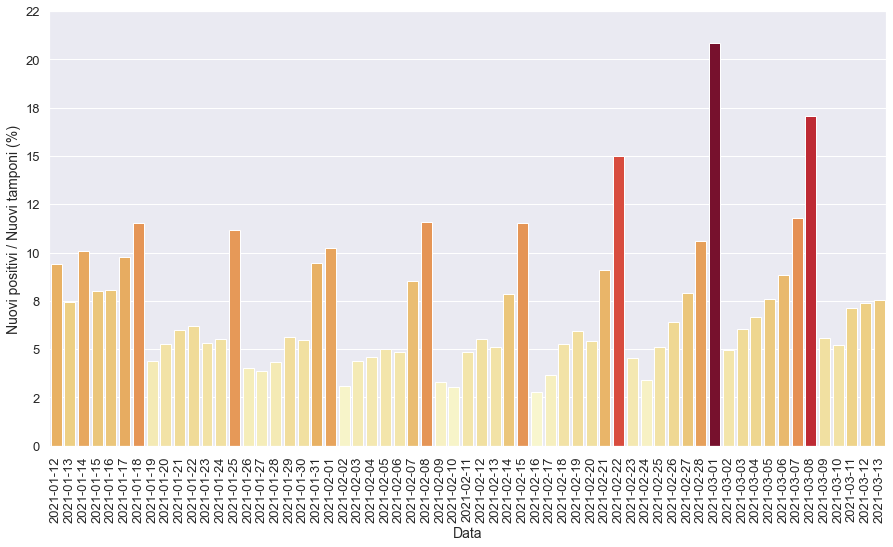

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

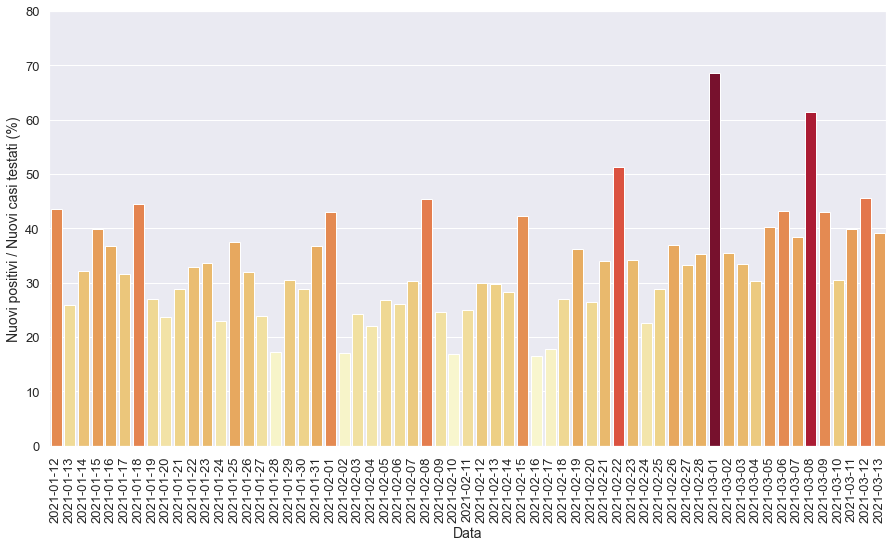

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

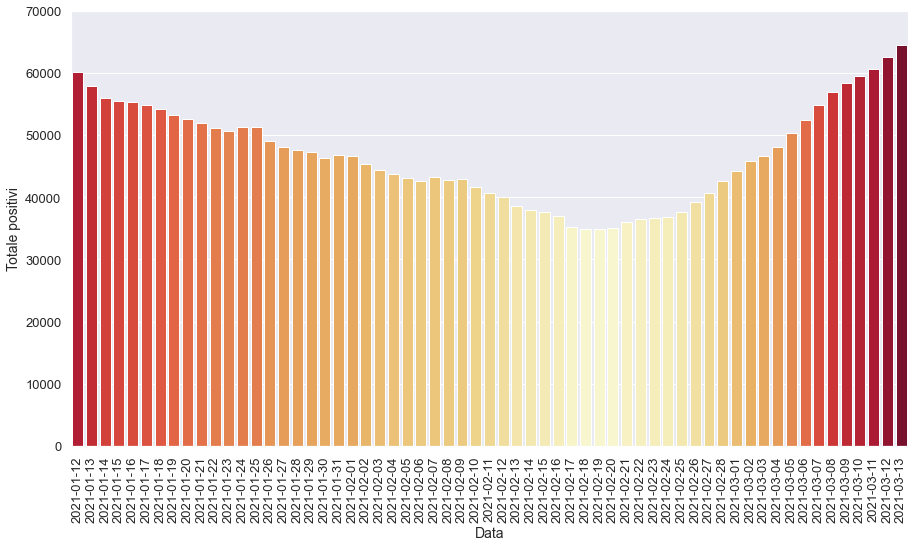

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

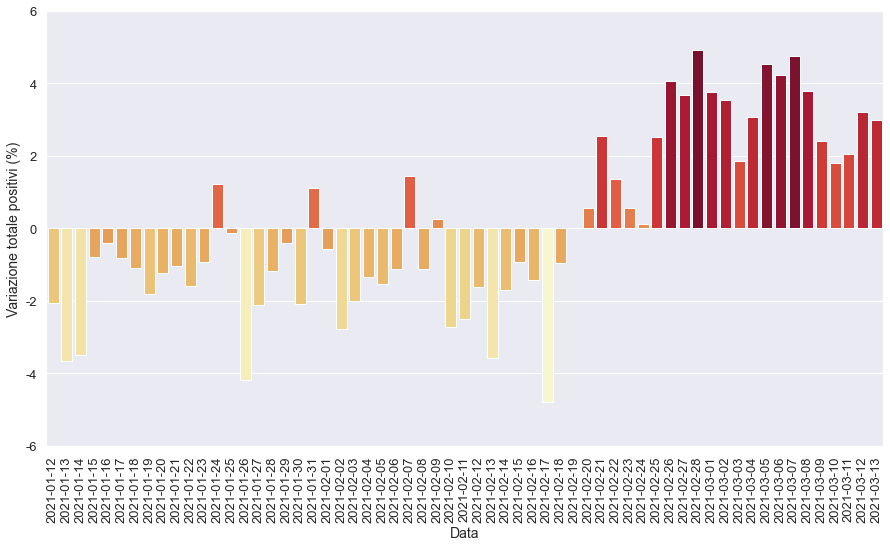

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

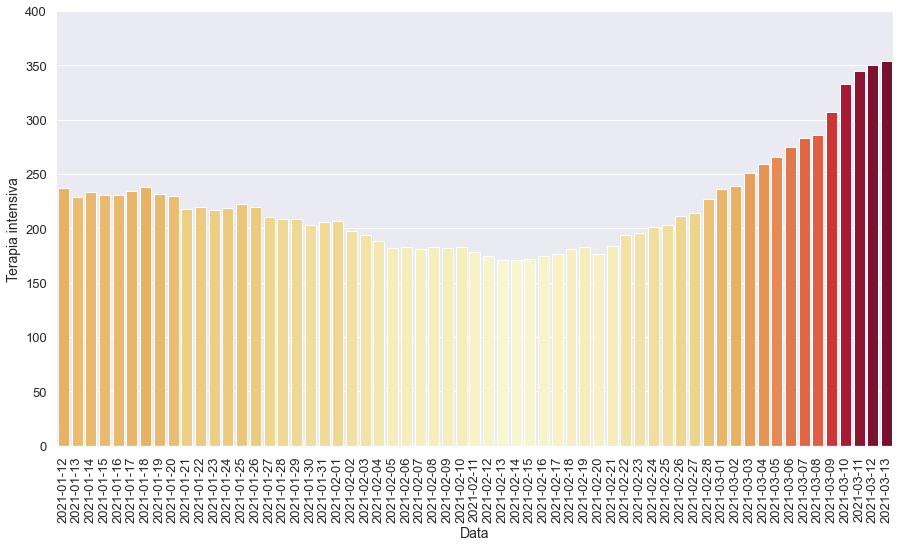

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

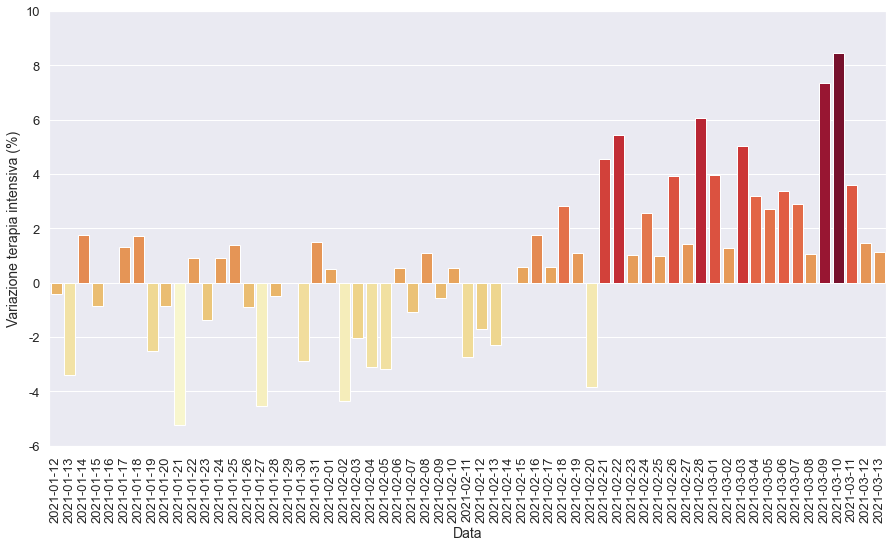

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

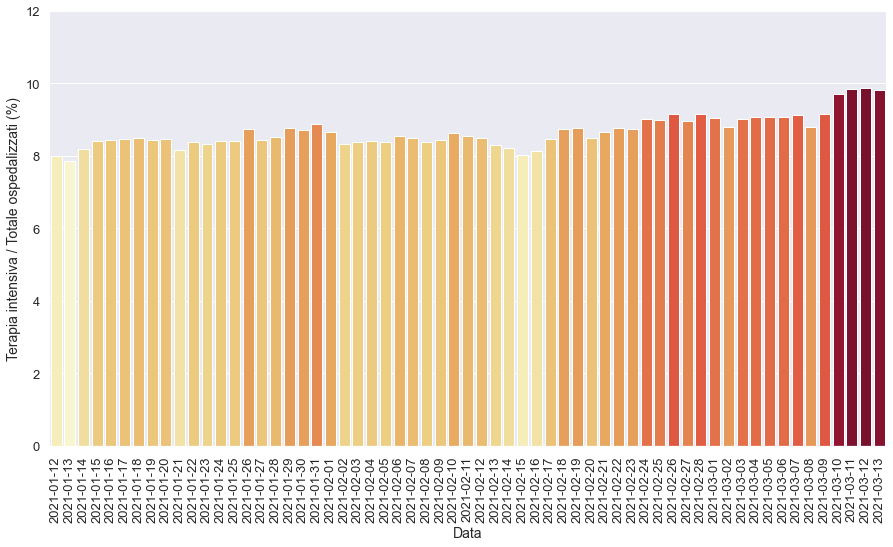

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

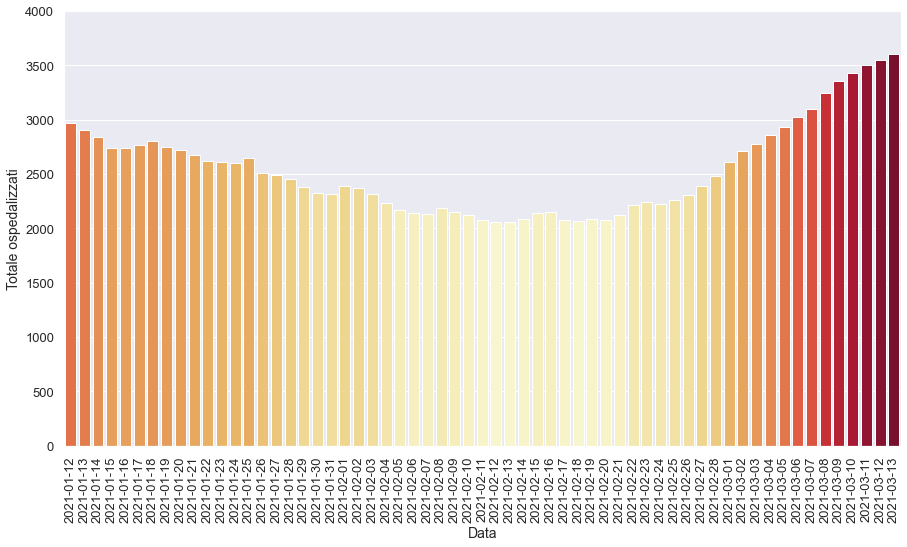

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

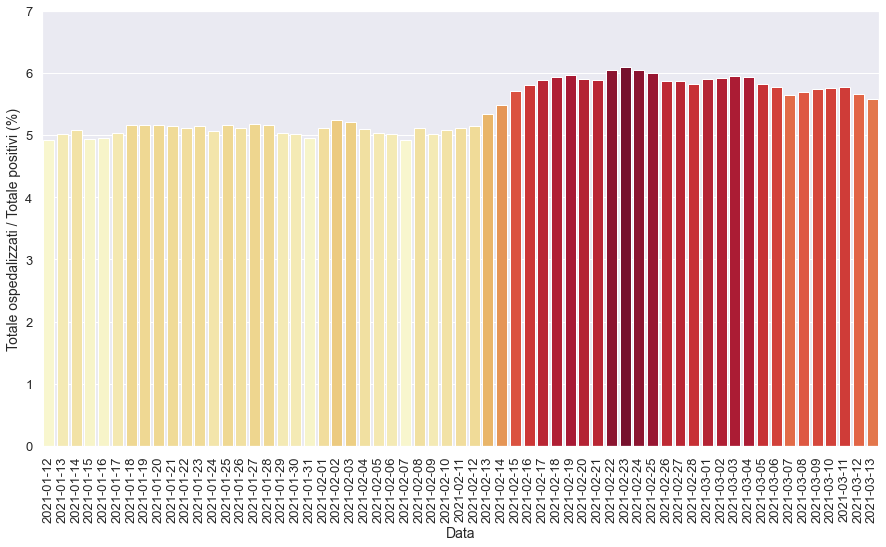

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

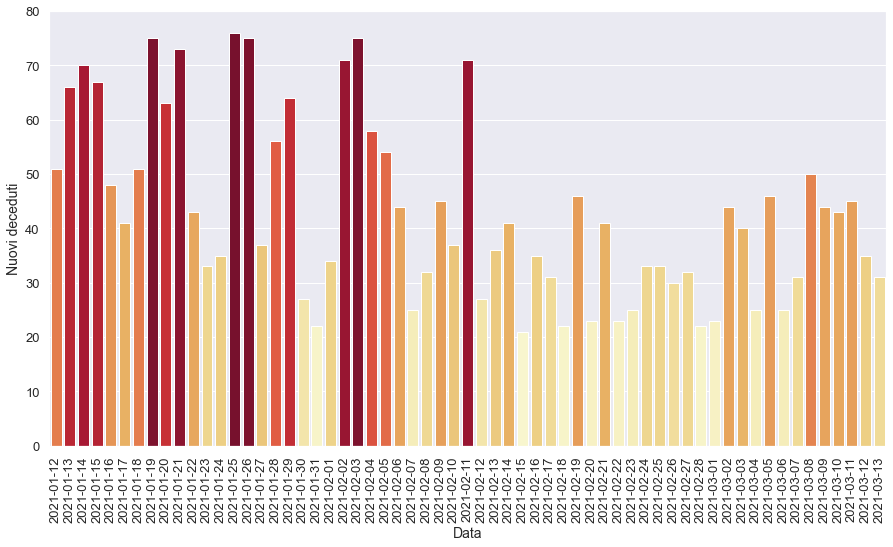

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

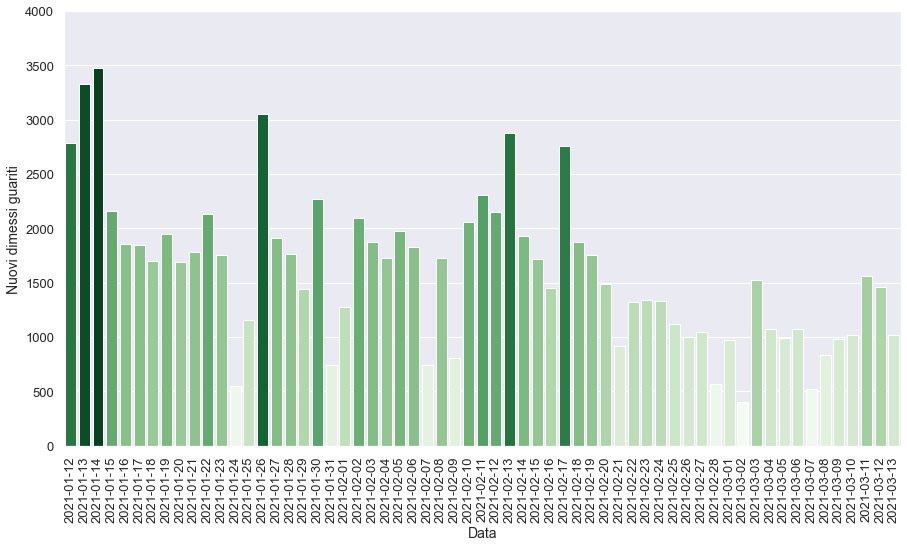

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-11T17:00:00,8,Emilia-Romagna,1903,178,2081,38591,40672,-1041,1345,...,71.0,27703.0,5392.0,-1002.0,8.55,5.12,4.86,24.94,-2.73,-2.50
1,2021-02-12T17:00:00,8,Emilia-Romagna,1886,175,2061,37952,40013,-659,1538,...,27.0,27986.0,5129.0,-639.0,8.49,5.15,5.50,29.99,-1.69,-1.62
2,2021-02-13T17:00:00,8,Emilia-Romagna,1889,171,2060,36518,38578,-1435,1488,...,36.0,29053.0,4994.0,-1434.0,8.30,5.34,5.12,29.80,-2.29,-3.59
3,2021-02-14T17:00:00,8,Emilia-Romagna,1911,171,2082,35838,37920,-658,1323,...,41.0,16816.0,4667.0,-680.0,8.21,5.49,7.87,28.35,0.00,-1.71
4,2021-02-15T17:00:00,8,Emilia-Romagna,1972,172,2144,35426,37570,-350,1391,...,21.0,12058.0,3290.0,-412.0,8.02,5.71,11.54,42.28,0.58,-0.92
5,2021-02-16T17:00:00,8,Emilia-Romagna,1975,175,2150,34887,37037,-533,968,...,35.0,34678.0,5876.0,-539.0,8.14,5.81,2.79,16.47,1.74,-1.42
6,2021-02-17T17:00:00,8,Emilia-Romagna,1902,176,2078,33190,35268,-1769,1025,...,31.0,27947.0,5739.0,-1697.0,8.47,5.89,3.67,17.86,0.57,-4.78
7,2021-02-18T17:00:00,8,Emilia-Romagna,1890,181,2071,32858,34929,-339,1565,...,22.0,29633.0,5787.0,-332.0,8.74,5.93,5.28,27.04,2.84,-0.96
8,2021-02-19T17:00:00,8,Emilia-Romagna,1902,183,2085,32852,34937,8,1821,...,46.0,30716.0,5022.0,-6.0,8.78,5.97,5.93,36.26,1.10,0.02
9,2021-02-20T17:00:00,8,Emilia-Romagna,1899,176,2075,33058,35133,196,1724,...,23.0,31943.0,6500.0,206.0,8.48,5.91,5.40,26.52,-3.83,0.56


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

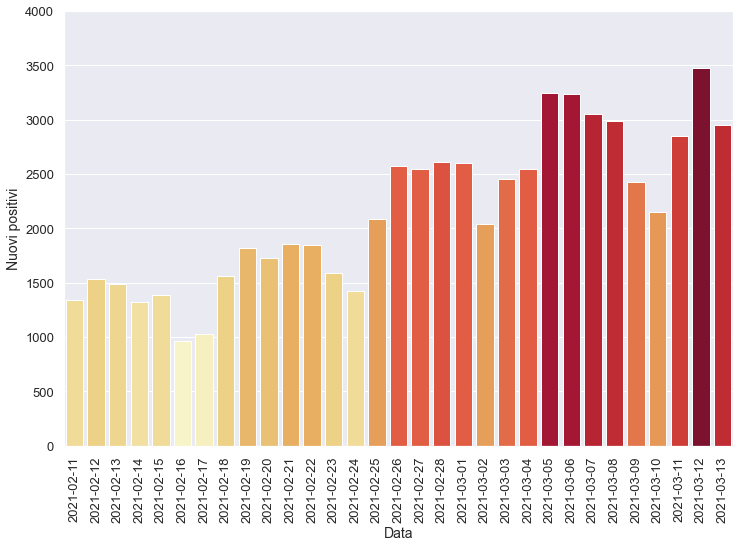

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

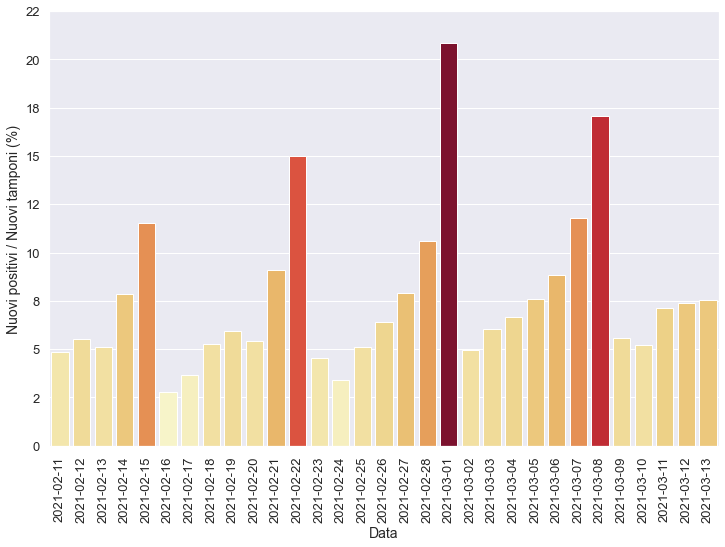

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

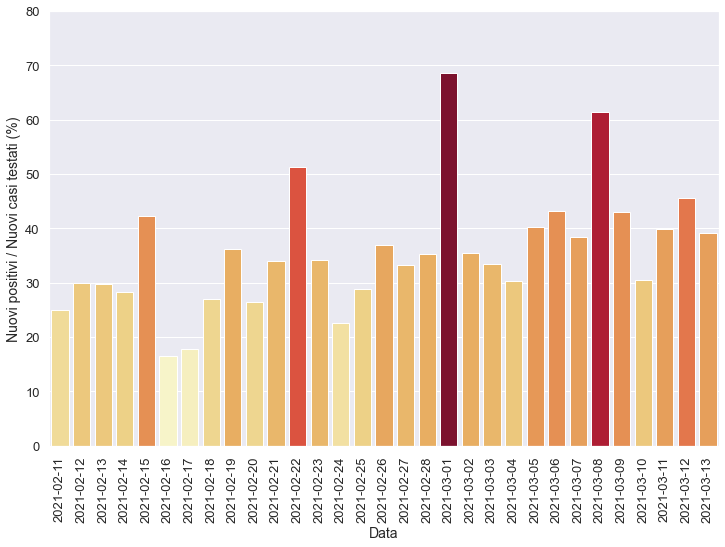

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

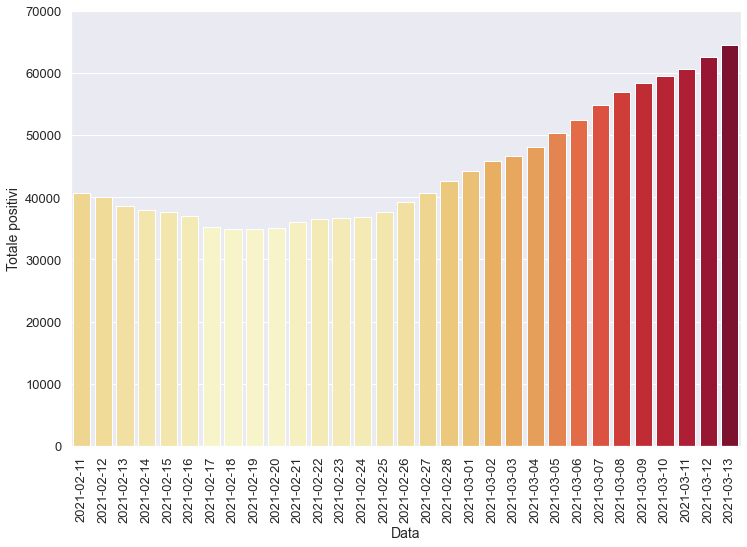

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

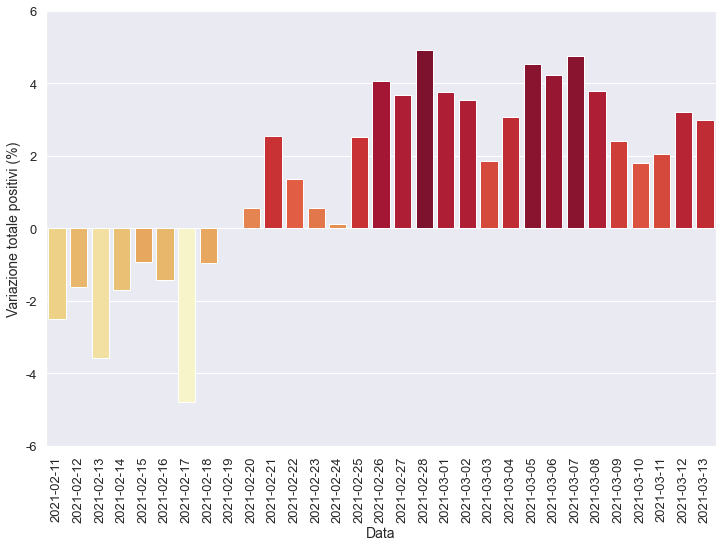

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

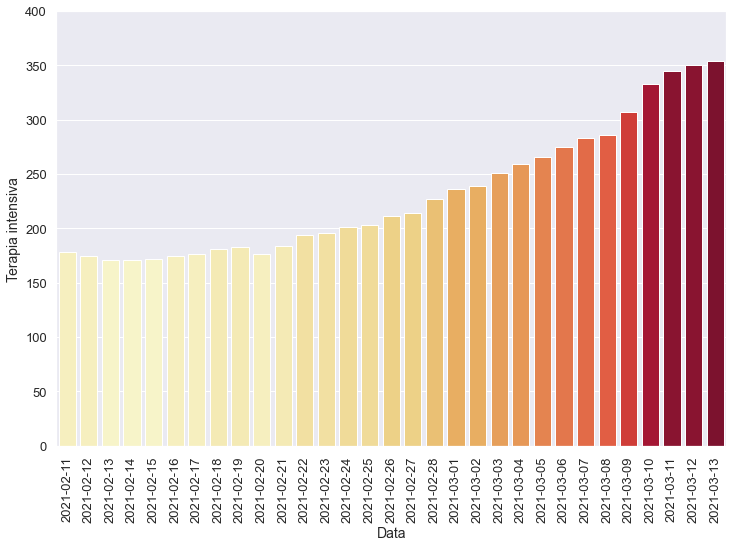

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

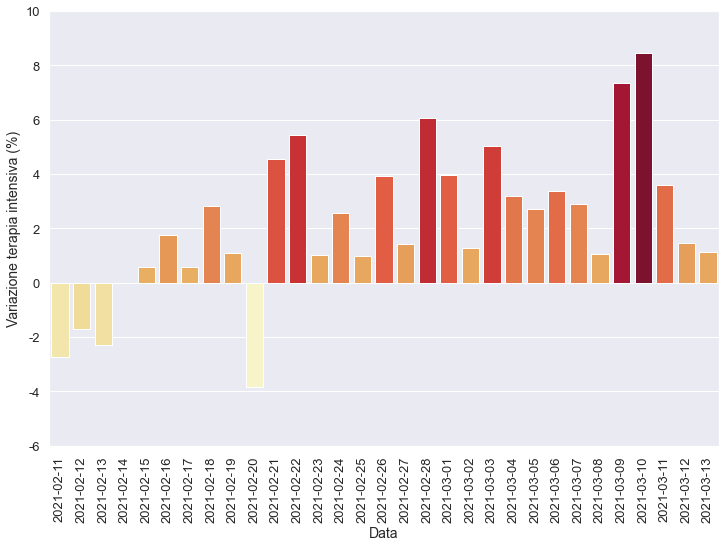

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

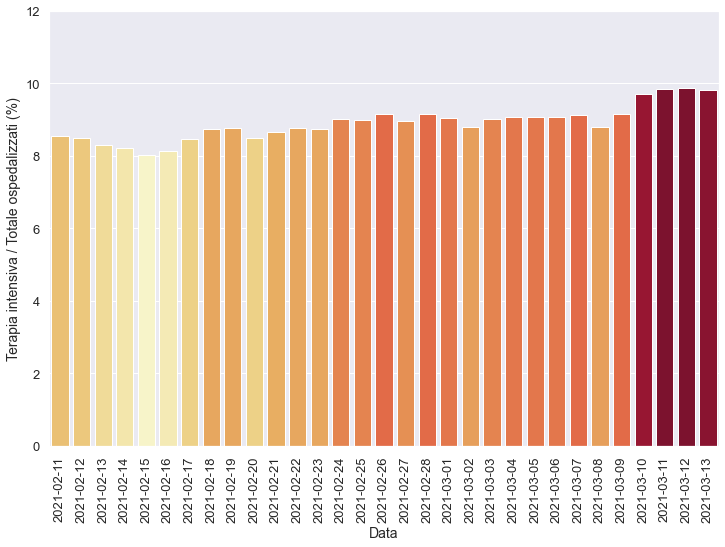

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

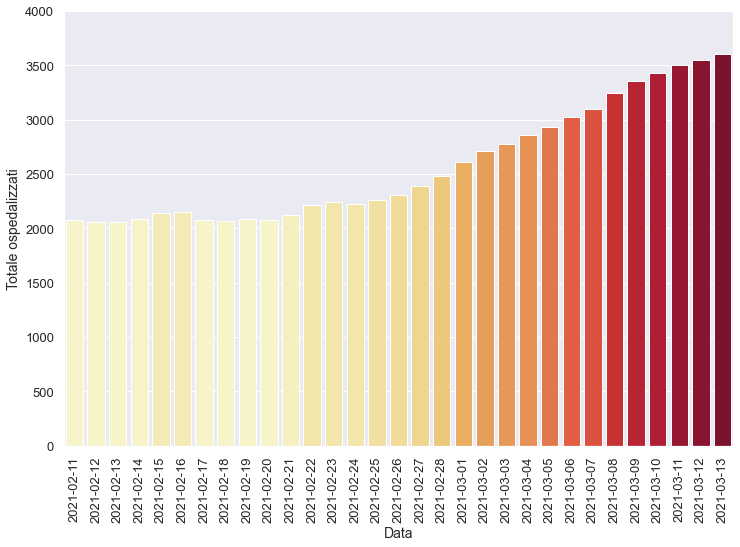

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

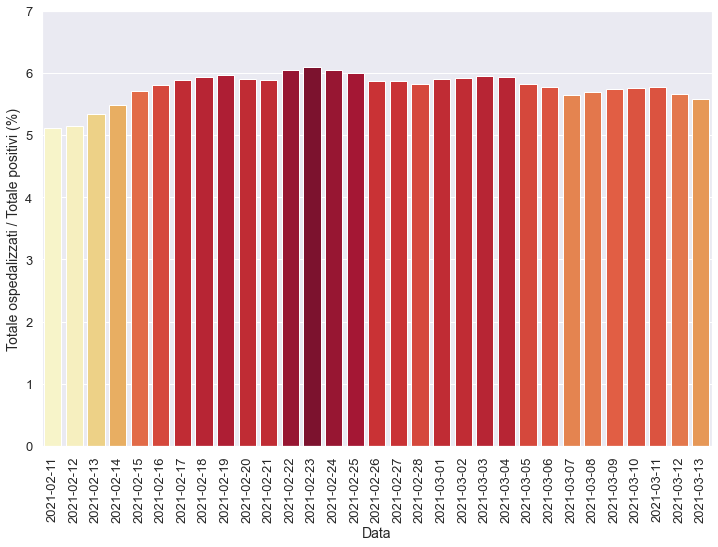

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

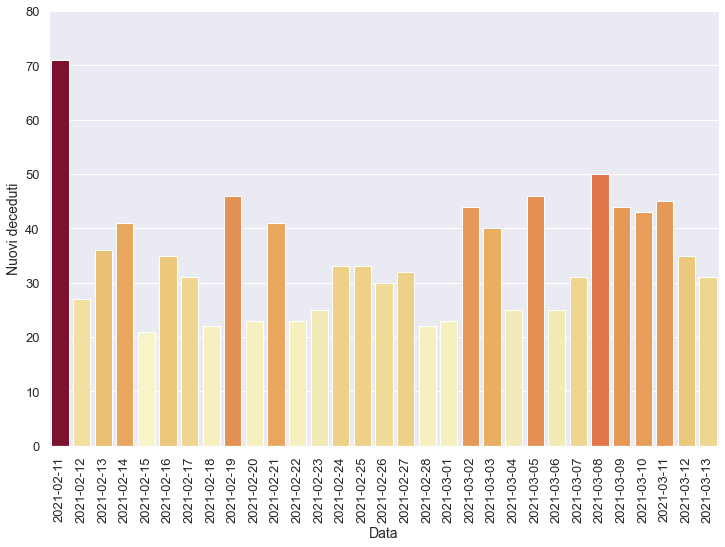

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

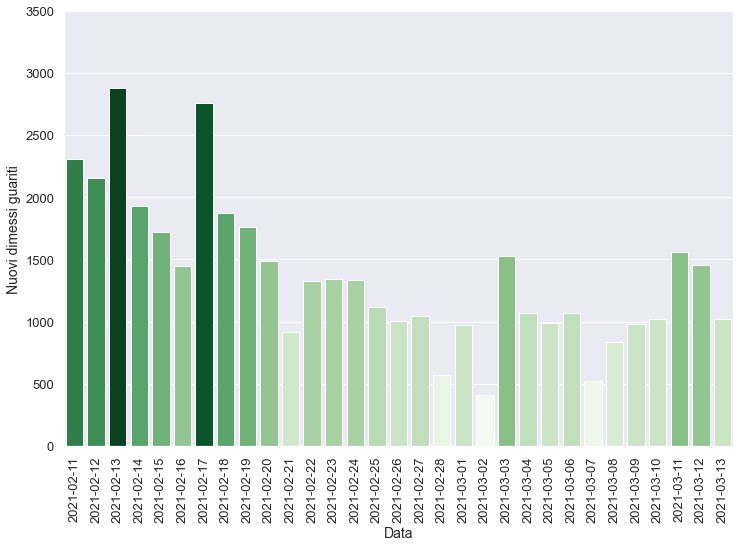

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-06T17:00:00,8,Emilia-Romagna,2753,275,3028,49414,52442,2128,3232,...,25.0,36607.0,7495.0,2029.0,9.08,5.77,8.83,43.12,3.38,4.23
1,2021-03-07T17:00:00,8,Emilia-Romagna,2813,283,3096,51839,54935,2493,3056,...,31.0,25888.0,7938.0,2425.0,9.14,5.64,11.80,38.50,2.91,4.75
2,2021-03-08T17:00:00,8,Emilia-Romagna,2960,286,3246,53772,57018,2083,2987,...,50.0,17492.0,4859.0,1933.0,8.81,5.69,17.08,61.47,1.06,3.79
3,2021-03-09T17:00:00,8,Emilia-Romagna,3044,307,3351,55045,58396,1378,2429,...,44.0,43575.0,5639.0,1273.0,9.16,5.74,5.57,43.08,7.34,2.42
4,2021-03-10T17:00:00,8,Emilia-Romagna,3094,333,3427,56021,59448,1052,2155,...,43.0,41414.0,7051.0,976.0,9.72,5.76,5.20,30.56,8.47,1.80
5,2021-03-11T17:00:00,8,Emilia-Romagna,3161,345,3506,57160,60666,1218,2845,...,45.0,39832.0,7128.0,1139.0,9.84,5.78,7.14,39.91,3.60,2.05
6,2021-03-12T17:00:00,8,Emilia-Romagna,3197,350,3547,59070,62617,1951,3477,...,35.0,47160.0,7619.0,1910.0,9.87,5.66,7.37,45.64,1.45,3.22
7,2021-03-13T17:00:00,8,Emilia-Romagna,3254,354,3608,60879,64487,1870,2950,...,31.0,39228.0,7524.0,1809.0,9.81,5.59,7.52,39.21,1.14,2.99


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

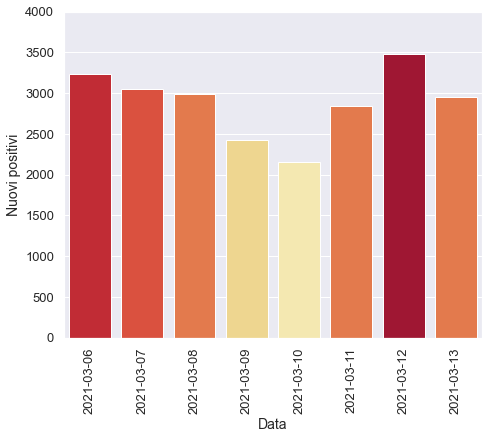

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

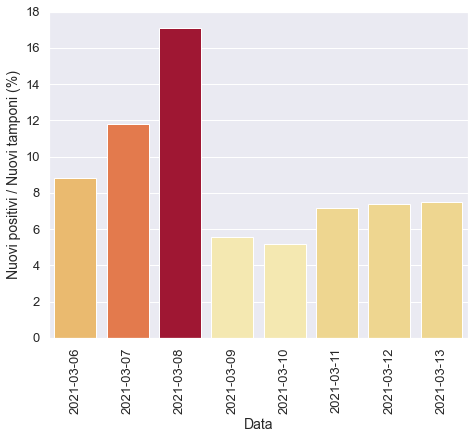

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

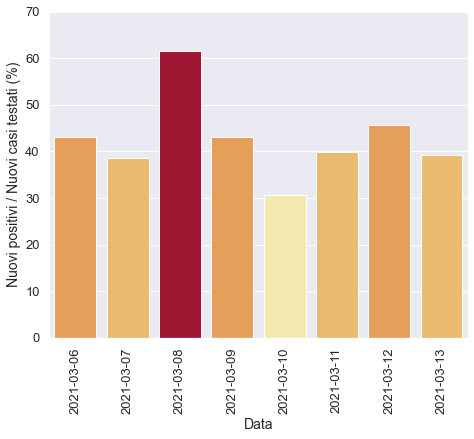

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

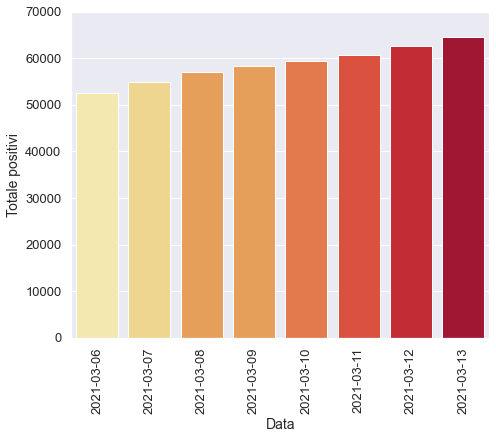

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

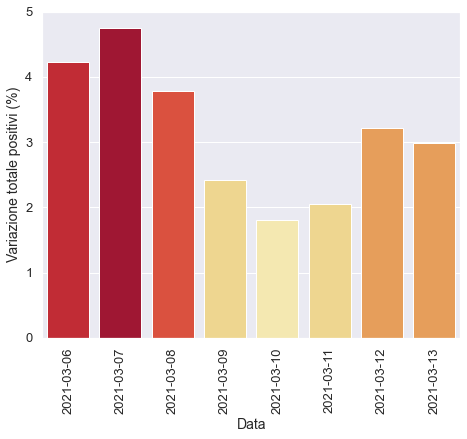

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

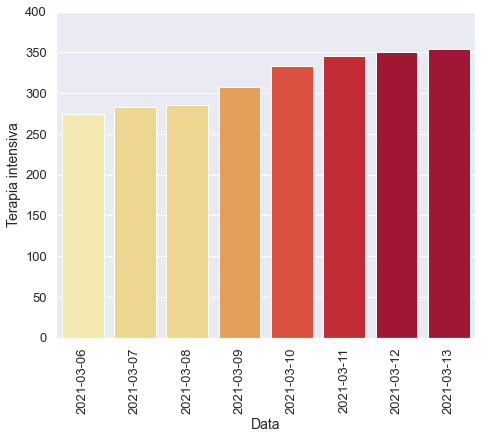

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

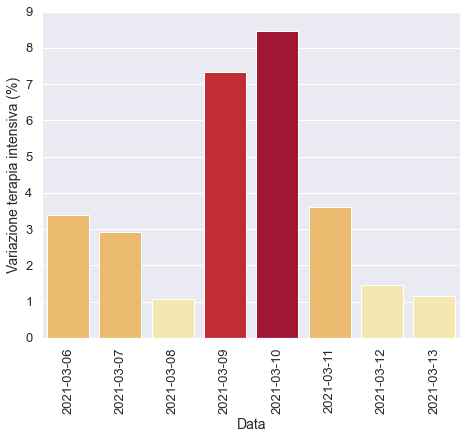

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

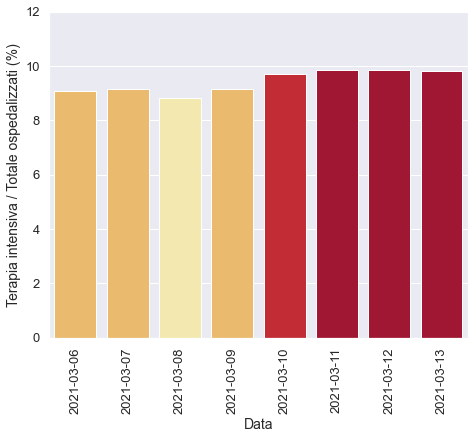

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

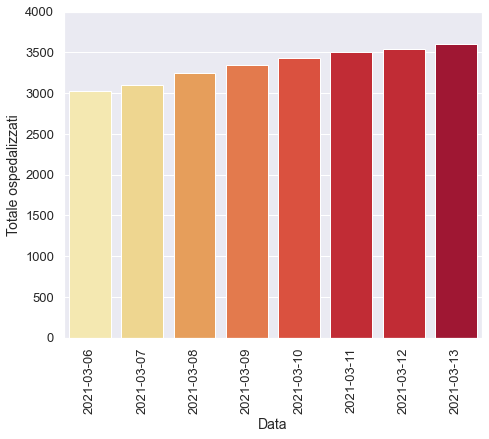

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

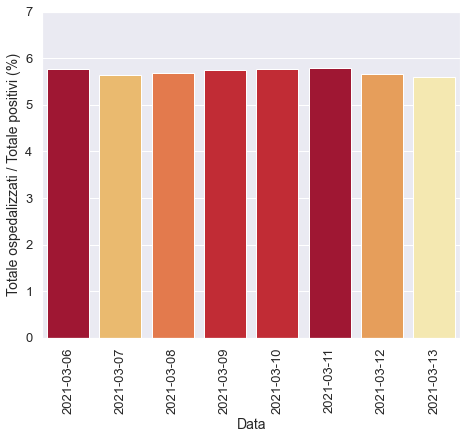

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

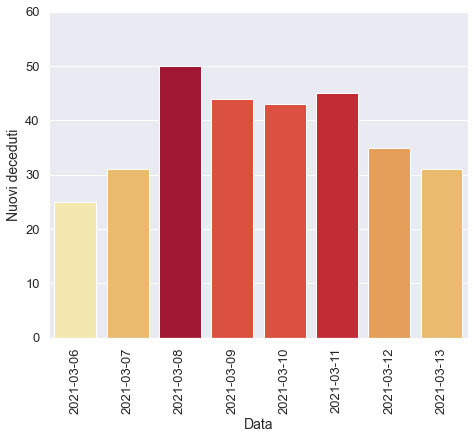

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

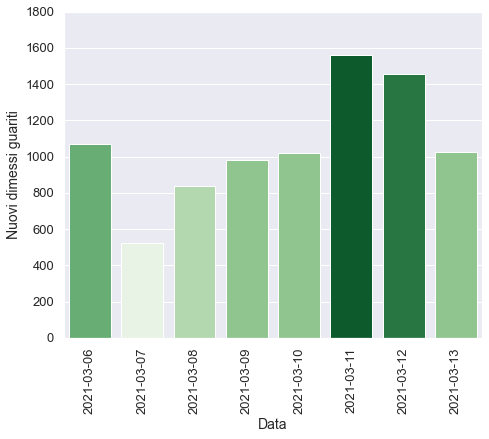

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)